In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import os

In [4]:
diri = r'C:\Users\apbarret\Documents\data\piomas_ice_volume'
fili = 'PIOMAS.vol.daily.1979.2017.Current.v2.1.dat.gz'

In [6]:
df_vol = pd.read_csv(os.path.join(diri,fili), sep='\s+')
df_vol.head()

,Year,#day,Vol
0,1979,1,26.405
1,1979,2,26.496
2,1979,3,26.582
3,1979,4,26.672
4,1979,5,26.770


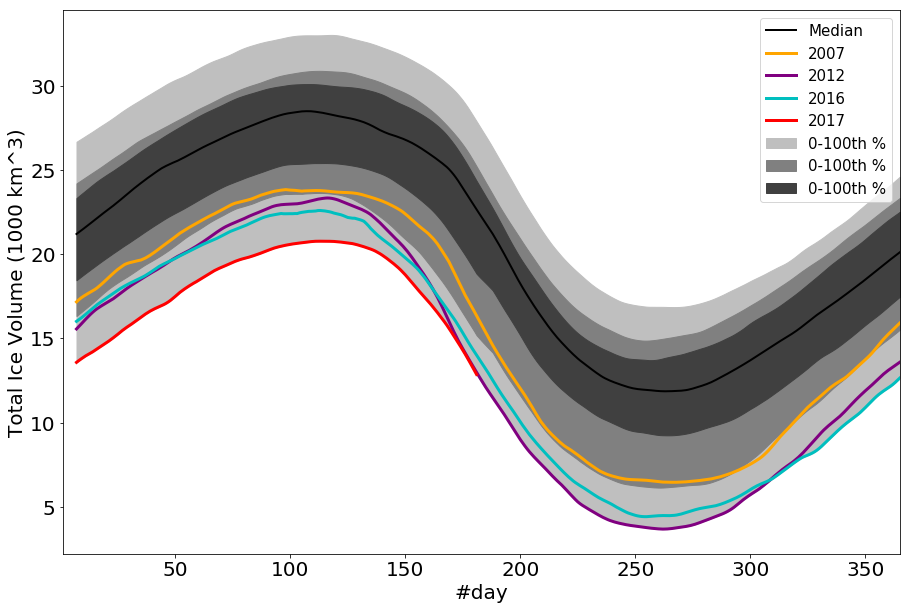

In [24]:
pt_vol = df_vol.pivot(index='#day', columns='Year', values='Vol')

fig, ax = plt.subplots(figsize=(15,10))

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Total Ice Volume (1000 km^3)', fontsize=20)
ax.set_xlabel('Day of Year', fontsize=20)

ax.fill_between(pt_vol.index, pt_vol.min(1).rolling(7,win_type='boxcar').mean(), 
                pt_vol.max(1).rolling(7,win_type='boxcar').mean(), 
                color='0.75', label='0-100th %')
ax.fill_between(pt_vol.index, pt_vol.quantile(0.15, axis=1).rolling(7,win_type='boxcar').mean(), 
                pt_vol.quantile(0.85, axis=1).rolling(7,win_type='boxcar').mean(), 
                color='0.5', label='0-100th %')
ax.fill_between(pt_vol.index, pt_vol.quantile(0.3, axis=1).rolling(7,win_type='boxcar').mean(), 
                pt_vol.quantile(0.7, axis=1).rolling(7,win_type='boxcar').mean(), 
                color='0.25', label='0-100th %')
pt_vol.median(1).rolling(7,win_type='boxcar').mean().plot(ax=ax, color='k', linewidth=2, label='Median')

pt_vol[2007].rolling(7,win_type='boxcar').mean().plot(ax=ax, color='orange', linewidth=3)
pt_vol[2012].rolling(7,win_type='boxcar').mean().plot(ax=ax, color='purple', linewidth=3)

pt_vol[2016].rolling(7,win_type='boxcar').mean().plot(ax=ax, color='c', linewidth=3)
pt_vol[2017].rolling(7,win_type='boxcar').mean().plot(ax=ax, color='r', linewidth=3)

plt.legend(fontsize=15)